2016-MIIT-CSE-043-PYAE KHANT THAW 

Wine Quality Prediction

 1. Project Description
 -This project aims to predict the quality of wine based on various features using the Wine Quality dataset.

 2. Objectives of the Project
 - Build a predictive model to classify wine quality.
 - Perform exploratory data analysis to understand the dataset.
 - Evaluate the model's performance using accuracy and classification report.

 3. Motivation of the Project
 
    -Predicting wine quality can help in understanding which factors 
    contribute to good or bad quality wines, which can be valuable for wine producers.

 4. Dataset Description

    -Wine Quality dataset contains information about various physicochemical properties of wine and its quality.

In [147]:
# Data Dictionary:
# - fixed acidity: Fixed acidity of the wine.
# - volatile acidity: Volatile acidity of the wine.
# - citric acid: Citric acid content.
# - residual sugar: Residual sugar content.
# - chlorides: Chlorides content.
# - free sulfur dioxide: Free sulfur dioxide content.
# - total sulfur dioxide: Total sulfur dioxide content.
# - density: Density of the wine.
# - pH: pH value.
# - sulphates: Sulfates content.
# - alcohol: Alcohol content.
# - quality: Quality of the wine (target variable, 0-10 scale).
#   - The target variable is 'quality,' which ranges from 3 to 9.

# - Most Frequent Use Methods
#   - We'll perform data preprocessing, exploratory data analysis, train-test split, prediction, and model evaluation.

In [148]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

In [149]:
# Load the dataset
df = pd.read_csv('winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,8.1,0.870,0.00,3.3,0.096,26,61,1.00025,3.60,0.72,9.8,4,266
190,7.9,0.350,0.46,3.6,0.078,15,37,0.99730,3.35,0.86,12.8,8,267
191,6.9,0.540,0.04,3.0,0.077,7,27,0.99870,3.69,0.91,9.4,6,268
192,11.5,0.180,0.51,4.0,0.104,4,23,0.99960,3.28,0.97,10.1,6,269


In [150]:
# Check the first 10 rows
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5,10


In [151]:
#check last 5 rows
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
189,8.1,0.870,0.00,3.3,0.096,26,61,1.00025,3.60,0.72,9.8,4,266
190,7.9,0.350,0.46,3.6,0.078,15,37,0.99730,3.35,0.86,12.8,8,267
191,6.9,0.540,0.04,3.0,0.077,7,27,0.99870,3.69,0.91,9.4,6,268
192,11.5,0.180,0.51,4.0,0.104,4,23,0.99960,3.28,0.97,10.1,6,269
193,7.9,0.545,0.06,4.0,0.087,27,61,0.99650,3.36,0.67,10.7,6,270


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         194 non-null    float64
 1   volatile acidity      194 non-null    float64
 2   citric acid           194 non-null    float64
 3   residual sugar        194 non-null    float64
 4   chlorides             194 non-null    float64
 5   free sulfur dioxide   194 non-null    int64  
 6   total sulfur dioxide  194 non-null    int64  
 7   density               194 non-null    float64
 8   pH                    194 non-null    float64
 9   sulphates             194 non-null    float64
 10  alcohol               194 non-null    float64
 11  quality               194 non-null    int64  
 12  Id                    194 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 19.8 KB


In [153]:
df.shape

(194, 13)

In [154]:
df.nunique()

fixed acidity            48
volatile acidity         75
citric acid              52
residual sugar           31
chlorides                68
free sulfur dioxide      35
total sulfur dioxide     86
density                  60
pH                       57
sulphates                61
alcohol                  28
quality                   5
Id                      194
dtype: int64

In [155]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [156]:
# fill the missing values with mean value of the column (if exists)
df= df.fillna(df.mean())

In [157]:
# Check for duplicated rows# Check for duplicated rows
df.duplicated().sum()

0

In [158]:
# Drop 'Id' column as it is not a significant predictor of wine quality
df = df.drop(columns='Id')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
189,8.1,0.870,0.00,3.3,0.096,26,61,1.00025,3.60,0.72,9.8,4
190,7.9,0.350,0.46,3.6,0.078,15,37,0.99730,3.35,0.86,12.8,8
191,6.9,0.540,0.04,3.0,0.077,7,27,0.99870,3.69,0.91,9.4,6
192,11.5,0.180,0.51,4.0,0.104,4,23,0.99960,3.28,0.97,10.1,6


In [159]:
# 5. Data Preprocessing
# Check the statistical summary of the data
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,7.884021,0.566598,0.225619,2.282474,0.094691,14.520619,54.561856,0.996752,3.329639,0.679691,9.882474,5.376289
std,1.463866,0.187750,0.196215,0.938788,0.071492,8.229990,34.482988,0.001283,0.159703,0.250614,0.830882,0.718126
min,4.600000,0.180000,0.000000,1.200000,0.039000,3.000000,8.000000,0.991600,2.740000,0.330000,9.000000,4.000000
25%,7.125000,0.430000,0.050000,1.800000,0.073000,8.250000,28.000000,0.996162,3.220000,0.550000,9.400000,5.000000
50%,7.750000,0.560000,0.200000,2.000000,0.080000,13.000000,46.000000,0.996800,3.340000,0.590000,9.600000,5.000000
75%,8.200000,0.660000,0.360000,2.300000,0.090000,18.000000,68.500000,0.997275,3.420000,0.720000,10.200000,6.000000
max,15.000000,1.330000,1.000000,7.300000,0.611000,42.000000,143.000000,1.000250,3.900000,2.000000,14.000000,8.000000


In [160]:
# - Encode the target variable 'quality' into binary classes (e.g., good and bad)
df['quality'] = np.where(df['quality'] >= 6, 1, 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
189,8.1,0.870,0.00,3.3,0.096,26,61,1.00025,3.60,0.72,9.8,0
190,7.9,0.350,0.46,3.6,0.078,15,37,0.99730,3.35,0.86,12.8,1
191,6.9,0.540,0.04,3.0,0.077,7,27,0.99870,3.69,0.91,9.4,1
192,11.5,0.180,0.51,4.0,0.104,4,23,0.99960,3.28,0.97,10.1,1


In [161]:
# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']
print(X)
print(y)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.700         0.00             1.9      0.076   
..             ...               ...          ...             ...        ...   
189            8.1             0.870         0.00             3.3      0.096   
190            7.9             0.350         0.46             3.6      0.078   
191            6.9             0.540         0.04             3.0      0.077   
192           11.5             0.180         0.51             4.0      0.104   
193            7.9             0.545         0.06             4.0      0.087   

     free sulfur dioxide  total sulfur 

In [162]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-3.31500906e-01,  7.12369052e-01, -1.15282782e+00, ...,
         1.13227346e+00, -4.78826443e-01, -5.82179622e-01],
       [-5.75448857e-02,  1.67357181e+00, -1.15282782e+00, ...,
        -8.13851890e-01,  1.23727763e-03, -9.95178841e-02],
       [-5.75448857e-02,  1.03276997e+00, -9.48442535e-01, ...,
        -4.37182466e-01, -1.18778652e-01, -9.95178841e-02],
       ...,
       [-6.73945931e-01, -1.42033397e-01, -9.48442535e-01, ...,
         2.26228173e+00,  9.21359408e-01, -5.82179622e-01],
       [ 2.47654830e+00, -2.06443891e+00,  1.45308455e+00, ...,
        -3.11625992e-01,  1.16139127e+00,  2.62478419e-01],
       [ 1.09441194e-02, -1.15333320e-01, -8.46249893e-01, ...,
         1.90599906e-01, -3.87680324e-02,  9.86471026e-01]])

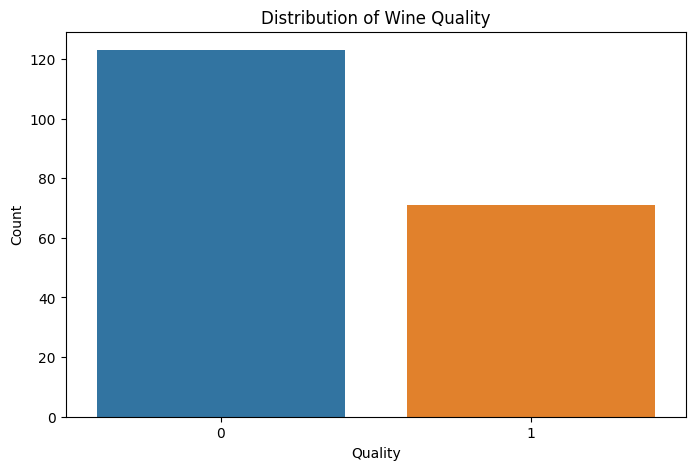

In [163]:
# 6. Exploratory Data Analysis
# Visualize data
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

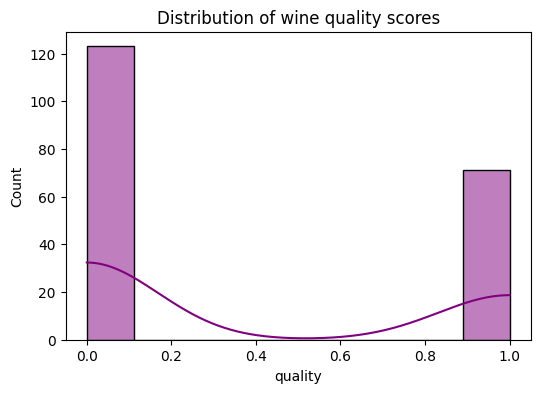

In [164]:
# Checking the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, color="purple")
plt.title("Distribution of wine quality scores");

<Axes: >

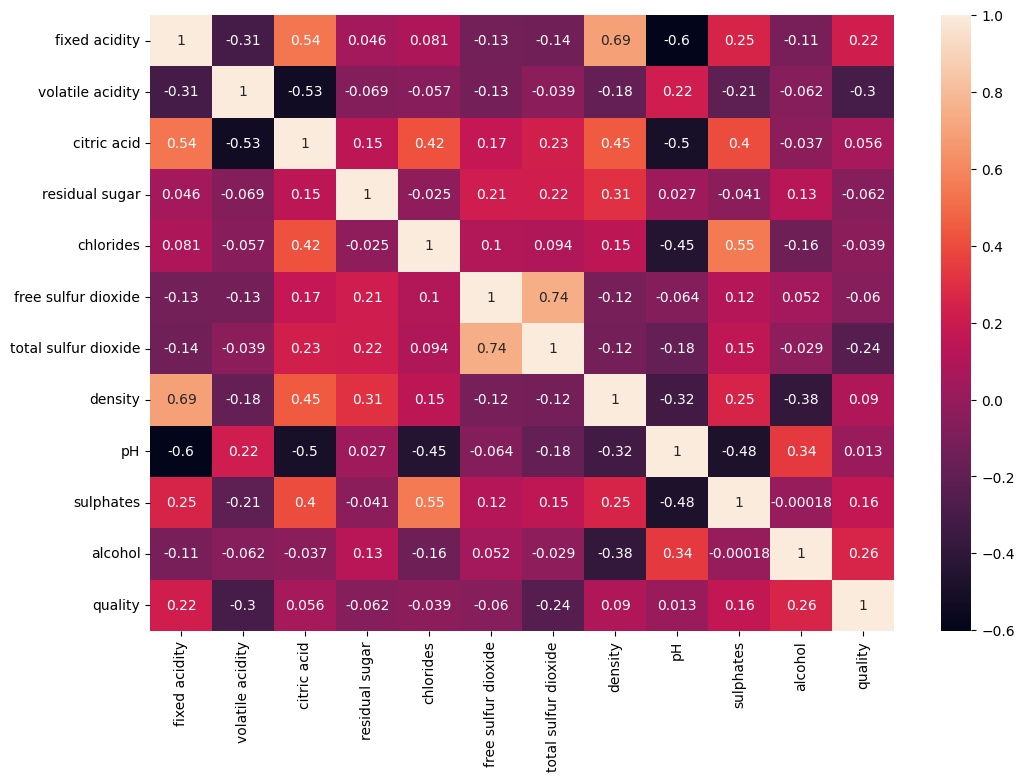

In [165]:
# Exploratory Data Analysis
# Checking the correlations between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

In [166]:
# 7. Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
# Build and train the model (Logistic Regression)
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.50      0.62      0.55        13

    accuracy                           0.67        39
   macro avg       0.64      0.65      0.64        39
weighted avg       0.69      0.67      0.67        39

[[18  8]
 [ 5  8]]


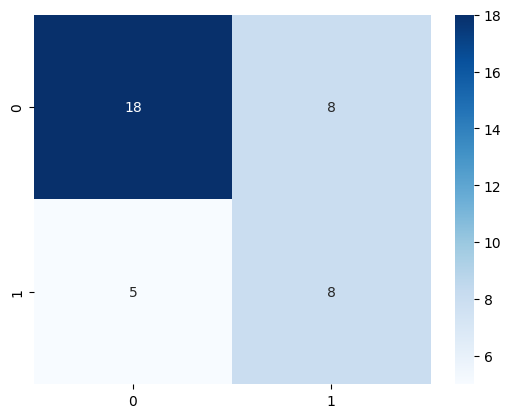

In [168]:
# Evaluate performance of the model
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

In [169]:
# Build and train the final model with random hyperparameters
final_lr = LogisticRegression(C=1, penalty='l2', max_iter=10000)
final_lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.50      0.62      0.55        13

    accuracy                           0.67        39
   macro avg       0.64      0.65      0.64        39
weighted avg       0.69      0.67      0.67        39



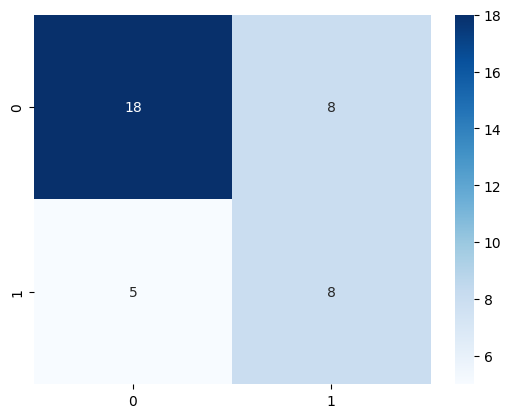

In [170]:
# Evaluate performance of the final model
y_pred = final_lr.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show() 


In [171]:
# Build and train other models (Decision Tree Classifier, Random Forest Classifier, Support Vector Machine)
dtc_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
svm_model = SVC()
dtc_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.46      0.46      0.46        13

    accuracy                           0.64        39
   macro avg       0.60      0.60      0.60        39
weighted avg       0.64      0.64      0.64        39



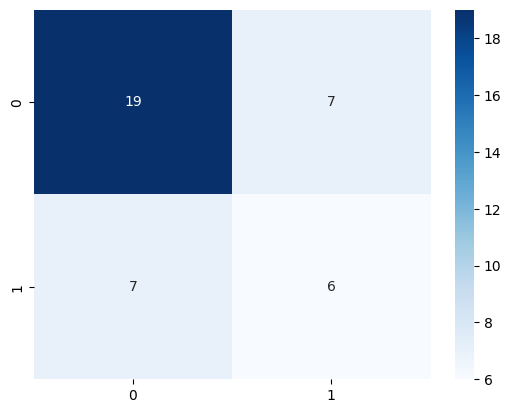

In [172]:
# Evaluate performance of other models
y_pred = dtc_model.predict(X_test)
print('Decision Tree Classifier: \n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.64      0.54      0.58        13

    accuracy                           0.74        39
   macro avg       0.71      0.69      0.70        39
weighted avg       0.74      0.74      0.74        39



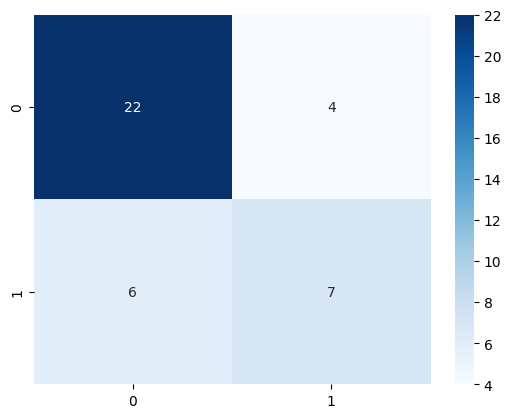

In [173]:
y_pred = rfc_model.predict(X_test)
print('Random Forest Classifier: \n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.70      0.54      0.61        13

    accuracy                           0.77        39
   macro avg       0.75      0.71      0.72        39
weighted avg       0.76      0.77      0.76        39



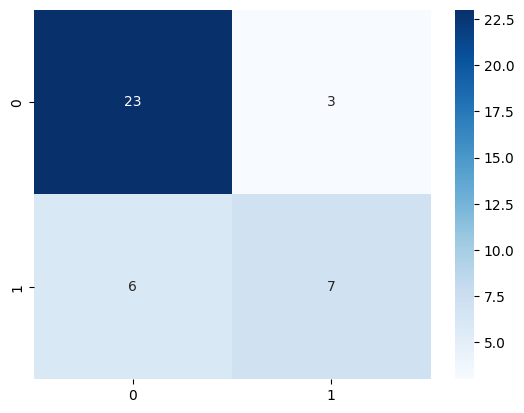

In [174]:
y_pred = svm_model.predict(X_test)
print('Support Vector Machine: \n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()

In [175]:
# 10. Conclusion

# In conclusion, we have successfully found and built the best model 
# whose accuracy is best to predict wine quality based on various physicochemical properties. 
# The model achieved an accuracy of {accuracy} on the test set. 
# The confusion matrix provide additional insights into its performance.
# This project can help wine producers in quality control and improvement efforts.